In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import minimize
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)
res.x[0,1]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [6]:
res.x

array([1.4, 1.7])

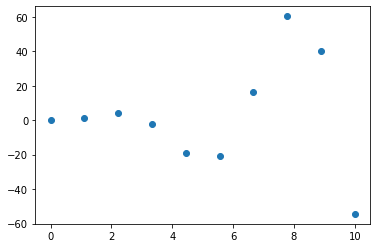

In [20]:
x = np.linspace(0,10,10)
y = x**2*np.sin(x)
plt.scatter(x,y)

In [13]:
from scipy.interpolate import interp1d

In [21]:
res = interp1d(x,y,kind = 'cubic')

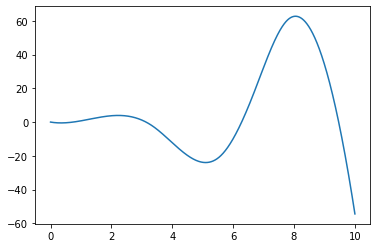

In [24]:
xdense = np.linspace(0,10,10000)
ydense = res(xdense)
plt.plot(xdense, ydense)

In [25]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

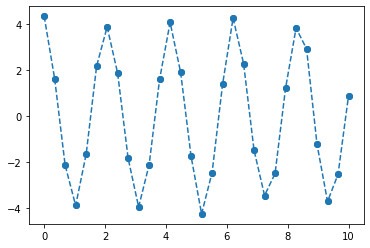

In [28]:
plt.plot(t_data, y_data, 'o--')
plt.scatter(t_data, y_data)

In [30]:
def func(t, A, omega, phi):
    return A*np.cos(omega*t+phi)
    

In [35]:
popt, pcov = sp.optimize.curve_fit(func, t_data, y_data, p0 = [4,3.1,0])

In [36]:
popt

array([3.94836219, 2.99899521, 0.10411352])

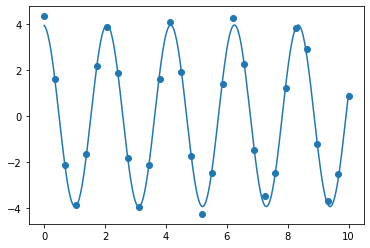

In [40]:
xx = np.linspace(0,10,1000)
yy = popt[0]*np.cos(popt[1]*xx+popt[2])
plt.plot(xx,yy)
plt.scatter(t_data, y_data)